# Titanic Disaster Prediction

Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.
Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date.

In my first project, I will discuss the Titanic dataset, which is the most basic project of kaggle, for data analysis on this subject. My goal is to build a machine learning model that predicts whether the passengers on board were killed in the crash.

I will follow the general roadmap in data analysis processes:
- I will look over the dataset and try to get a basic idea.
- I will use visualizations for this.
- Then, I will look for relationship between variables via statistical calculations. I will make changes to the data if necessary.
- I will examine missing and contradictory observations and make the necessary preliminary processes before modeling.
- Finally, I will fit my model and end my project..

First of all, I import NumPy and pandas libraries for operations and also seaborn, matplotlib and missingno libraries for visualizations.

In [1]:
# Data Process
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
a_df = pd.read_csv("train.csv")
a_df_t = pd.read_csv("test.csv")

df = a_df.copy()
df_t = a_df_t.copy()

The Dataset has been already separated. I copied them

### Exploring Data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset consists of 12 columns.
* Survived : Survival (1 = Yes, 0 = No)
* Sex : Gender
* Embarked: Port of Embarkation
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

 While Survived, Sex an Embarked nominal categorical, Pclass ordinal categorical variable.
* Age : Age in years
* Fare: Passenger fare
* SibSp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic

Pclass is ordinal, Age and Fare are numerical variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


I visualize the missing observations based on column and index, it turns out that only 20% of the data in the cabin data. More than 20% data appears to be missing in the Age variable.

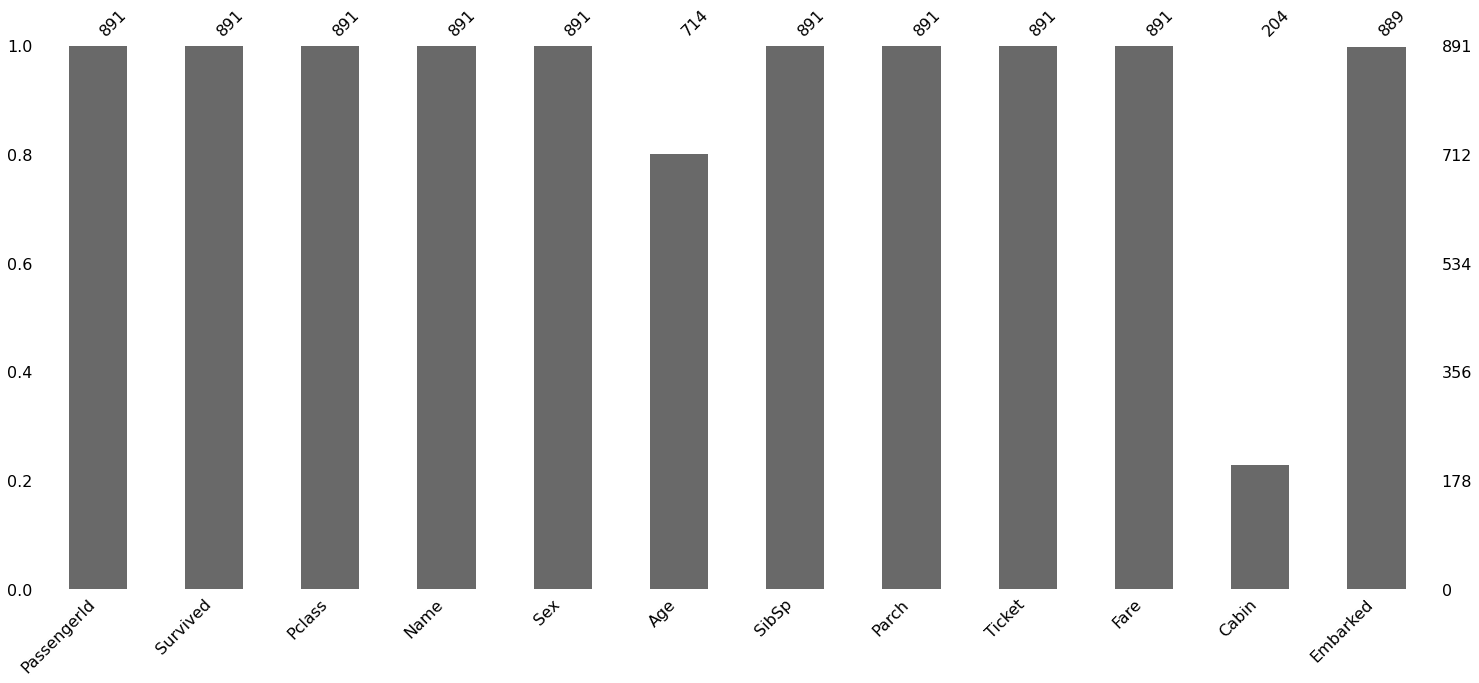

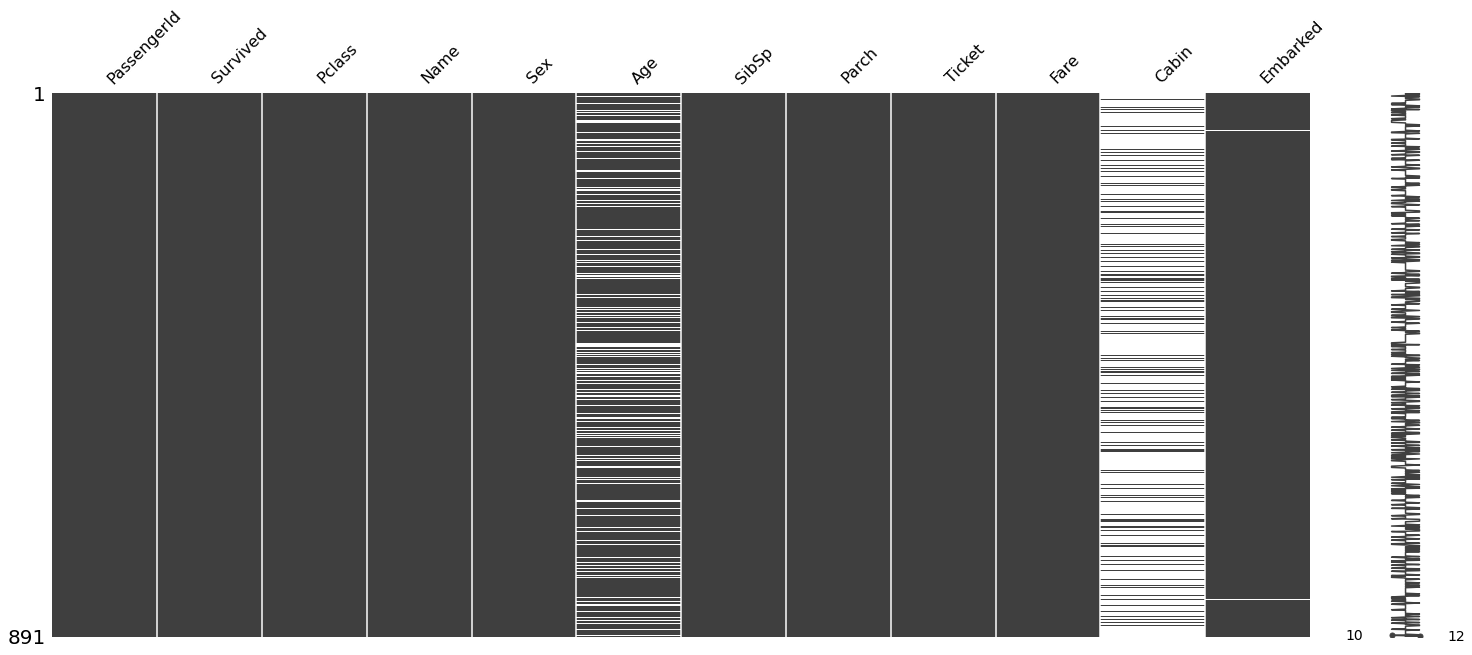

In [5]:
msno.bar(df);
msno.matrix(df);

In [6]:
df.drop(columns=["Name","Ticket","Cabin"],inplace=True)
df_t.drop(columns=["Name","Ticket","Cabin"],inplace=True)

I will use the PassengerId column instead of the name variable. I remove the Name, Ticket and Cabin columns from our data sets that are not meaningful to us.

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
df_t.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


After I checked for duplicated observations, I changed the indexes to the PassengerId column.

In [9]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [10]:
df_t[df_t.duplicated()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [11]:
df.index = df.PassengerId
df_t.index = df_t.PassengerId

In [12]:
df.drop(columns="PassengerId", inplace=True)
df_t.drop(columns="PassengerId", inplace=True)

In [13]:
df_t.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [15]:
df.index.name = None
df_t.index.name = None

In [16]:
df_t.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


The average age of the passengers in the data set is 29.69 and I see that the oldest passenger is 80. It is remarkable that the standard deviation in wages is greater than the average. The median is 14.45, 75% quartile is 31, but the maximum cost is 512, which shows discrete values in the Fare variable.

In [19]:
df.groupby("Survived").mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


I am checking the same stats to see if there's any difference based on survivability.
So, we can easily see that survivors and deceased have different mean values in the Fare and Pclass columns.

### Visualization

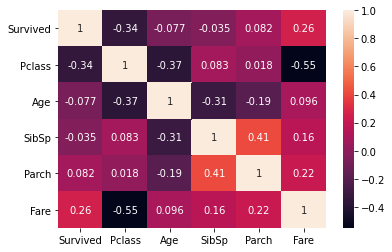

In [20]:
sns.heatmap(df.corr(),annot=True)
plt.show()

I examine the correlations between heatmap and numeric values. I see that the highest and most significant values are between Survived-Pclass(-0.34), Survived-Fare(0.26), SibSp-Pclass(-0.31) and Pclass-Fare(-0.55).

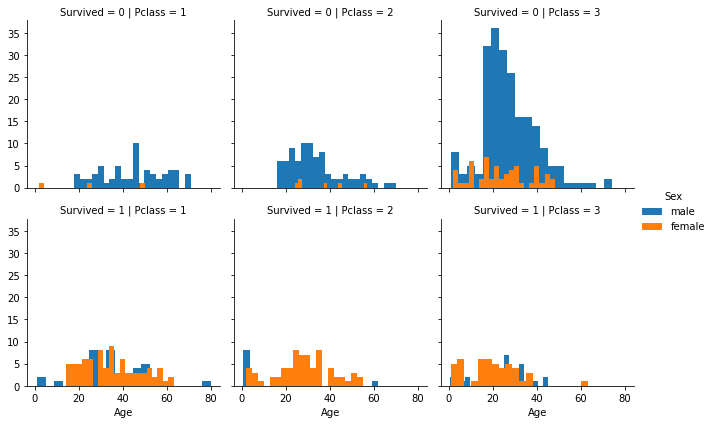

In [21]:
grid = sns.FacetGrid(df,col="Pclass",row="Survived",hue="Sex")
grid.map(plt.hist,"Age",bins=20)
grid.add_legend();

Let's examine the graphs where we use more variables at the same time to see in more detail. The columns show the Pclasses, the rows the Survived status. The x-axis of each graph represents age distributions, with blue representing men and orange representing women.

- It is clear that the death toll of male 3rd class passengers between the ages of 20 and 40 is much higher than that of other passengers.
- In general, we can say that men die more than women.

In the preprocessing, we will fill in the missing data with the KNN method. Before that, let's examine the variables of age and fare that have the highest correlation with Survived column.

C:\Users\ercan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


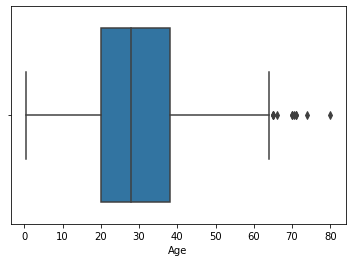

In [22]:
sns.boxplot(df["Age"]);

We can see the outliers in the chart above. In the chart below, we divide the passengers according to their classes. Here, the difference between outliers and classes becomes even more evident.

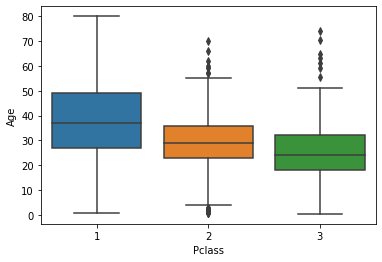

In [23]:
sns.boxplot(data=df, x="Pclass",y="Age");

In [24]:
df[df["Pclass"]==3].nlargest(3,["Age"]).index

Int64Index([852, 117, 281], dtype='int64')

In [25]:
df[df["Pclass"]==2].nlargest(3,["Age"]).index

Int64Index([673, 34, 571], dtype='int64')

In [26]:
df.drop(index=[852,117,281,673,34,571],inplace=True)

I delete the three observations with the maximum age value found in the 2nd and 3rd class.

You can see the boxplot graph after ı delete the outliers below.

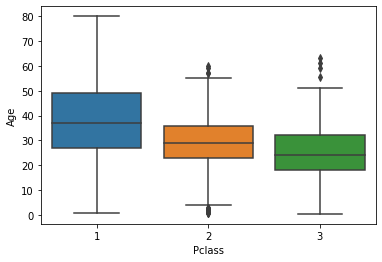

In [27]:
sns.boxplot(data=df, x="Pclass",y="Age");

<AxesSubplot:xlabel='Age'>

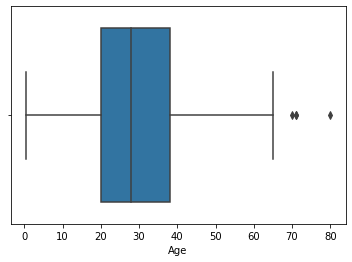

In [28]:
sns.boxplot(data=df,x="Age")

I will do the same process to Fare that highly correlated column with survived column too.

I delete 5 observations from the 1st class as I see that there are more outliers in the 1st class.

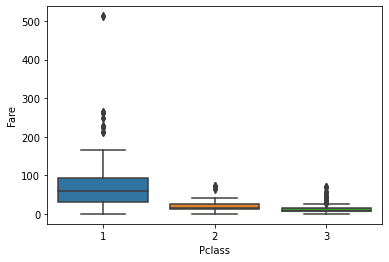

In [29]:
sns.boxplot(data=df, x="Pclass",y="Fare");

In [30]:
df[df["Pclass"]==3].nlargest(3,["Fare"]).index

Int64Index([160, 181, 202], dtype='int64')

In [31]:
df[df["Pclass"]==2].nlargest(3,["Fare"]).index

Int64Index([73, 121, 386], dtype='int64')

In [32]:
df[df["Pclass"]==1].nlargest(5,["Fare"]).index

Int64Index([259, 680, 738, 28, 89], dtype='int64')

In [33]:
df.drop(index=[160,181,202,73,121,386,259,680,738,28,89],inplace=True)

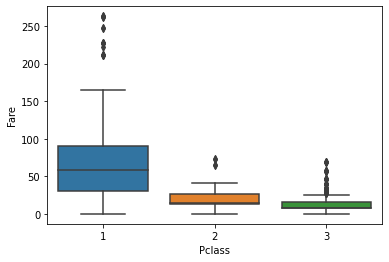

In [34]:
sns.boxplot(data=df, x="Pclass",y="Fare");

### Preprocessing

In the preprocessing section, I said that we will fill in our missing data with the KNN method. We do label encoding and one-hot decodingn for the algorithm we will use in this method.

we need to convert strings to numerical data. We start with the variable of gender. We set male status as 1 and female status as 0. Our gender variable has now become a numerical variable. We do the same for the test dataset.

In [35]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [36]:
lbe.fit_transform(df["Sex"])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [37]:
df["new_sex"] = lbe.fit_transform(df["Sex"])
df_t["new_sex"] = lbe.fit_transform(df_t["Sex"])

In [38]:
df.drop(columns="Sex",inplace=True)
df_t.drop(columns="Sex",inplace=True)

In [39]:
df.rename(columns={"new_sex":"sex"},inplace=True)
df_t.rename(columns={"new_sex":"sex"},inplace=True)

In [40]:
df_t.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,sex
892,3,34.5,0,0,7.8292,Q,1
893,3,47.0,1,0,7.0000,S,0
894,2,62.0,0,0,9.6875,Q,1
895,3,27.0,0,0,8.6625,S,1
896,3,22.0,1,1,12.2875,S,0


In [41]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,sex
1,0,3,22.0,1,0,7.2500,S,1
2,1,1,38.0,1,0,71.2833,C,0
3,1,3,26.0,0,0,7.9250,S,0
4,1,1,35.0,1,0,53.1000,S,0
5,0,3,35.0,0,0,8.0500,S,1


In [42]:
df[df['Embarked'].isnull()].index.tolist()

[62, 830]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  874 non-null    int64  
 1   Pclass    874 non-null    int64  
 2   Age       700 non-null    float64
 3   SibSp     874 non-null    int64  
 4   Parch     874 non-null    int64  
 5   Fare      874 non-null    float64
 6   Embarked  872 non-null    object 
 7   sex       874 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 98.0+ KB


In [44]:
df.drop(62,inplace=True)
df.drop(830,inplace=True)

I delete two observation that has missing values in embarked column.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  872 non-null    int64  
 1   Pclass    872 non-null    int64  
 2   Age       698 non-null    float64
 3   SibSp     872 non-null    int64  
 4   Parch     872 non-null    int64  
 5   Fare      872 non-null    float64
 6   Embarked  872 non-null    object 
 7   sex       872 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 57.9+ KB


This is a remarkeble point, because when we do one-hot encoding we can fall into dummy variable trap. To avoid this, there should be no more columns than the number of converted variable. So we made one-hot encoding the Embarked column by avoiding the dummy variable trap. We do the same for the test set.

In [46]:
lbe.fit_transform(df["Embarked"])
df_one_hot = pd.get_dummies(df,columns=["Embarked"],prefix=["Emb"])
df = df_one_hot

In [47]:
lbe.fit_transform(df_t["Embarked"])
df_one_hot = pd.get_dummies(df_t,columns=["Embarked"],prefix=["Emb"])
df_t = df_one_hot

In [48]:
lbe.fit_transform(df["Pclass"])
df_one_hot = pd.get_dummies(df,columns=["Pclass"],prefix=["cls"])
df = df_one_hot

In [49]:
lbe.fit_transform(df_t["Pclass"])
df_one_hot = pd.get_dummies(df_t,columns=["Pclass"],prefix=["cls"])
df_t = df_one_hot

After I finish all label encoding and one-hot decoding processes, I check the missing values.

In [50]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     332 non-null    float64
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    417 non-null    float64
 4   sex     418 non-null    int32  
 5   Emb_C   418 non-null    uint8  
 6   Emb_Q   418 non-null    uint8  
 7   Emb_S   418 non-null    uint8  
 8   cls_1   418 non-null    uint8  
 9   cls_2   418 non-null    uint8  
 10  cls_3   418 non-null    uint8  
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 20.4 KB


In [51]:
!pip install ycimpute
from ycimpute.imputer import knnimput

In [53]:
e_df = df.select_dtypes(include=["float64","int64","uint8"])
print(e_df.head())
e_df.isnull().sum()

   Survived   Age  SibSp  Parch     Fare  Emb_C  Emb_Q  Emb_S  cls_1  cls_2  \
1         0  22.0      1      0   7.2500      0      0      1      0      0   
2         1  38.0      1      0  71.2833      1      0      0      1      0   
3         1  26.0      0      0   7.9250      0      0      1      0      0   
4         1  35.0      1      0  53.1000      0      0      1      1      0   
5         0  35.0      0      0   8.0500      0      0      1      0      0   

   cls_3  
1      1  
2      0  
3      1  
4      0  
5      1  


Survived      0
Age         174
SibSp         0
Parch         0
Fare          0
Emb_C         0
Emb_Q         0
Emb_S         0
cls_1         0
cls_2         0
cls_3         0
dtype: int64

In [54]:
var_names = list(e_df)
n_df = np.array(e_df)
n_df.shape

(872, 11)

In [55]:
dff = knnimput.KNN(k=5).complete(n_df)

Imputing row 1/872 with 0 missing, elapsed time: 0.183
Imputing row 101/872 with 0 missing, elapsed time: 0.183
Imputing row 201/872 with 0 missing, elapsed time: 0.183
Imputing row 301/872 with 0 missing, elapsed time: 0.183
Imputing row 401/872 with 1 missing, elapsed time: 0.183
Imputing row 501/872 with 0 missing, elapsed time: 0.183
Imputing row 601/872 with 0 missing, elapsed time: 0.194
Imputing row 701/872 with 0 missing, elapsed time: 0.194
Imputing row 801/872 with 0 missing, elapsed time: 0.194


In [56]:
dff = pd.DataFrame(dff,columns=var_names)
dff.index = df.index
df["Age"] = dff["Age"]

In [57]:
df.isnull().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
sex         0
Emb_C       0
Emb_Q       0
Emb_S       0
cls_1       0
cls_2       0
cls_3       0
dtype: int64

By taking n equals 5, I filled the missing 174 age variables with the KNN algorithm.

I apply the same algorithm in the test data.

In [58]:
e_df_t = df_t.select_dtypes(include=["float64","int64","uint8"])
print(e_df_t.head())
e_df_t.isnull().sum()

      Age  SibSp  Parch     Fare  Emb_C  Emb_Q  Emb_S  cls_1  cls_2  cls_3
892  34.5      0      0   7.8292      0      1      0      0      0      1
893  47.0      1      0   7.0000      0      0      1      0      0      1
894  62.0      0      0   9.6875      0      1      0      0      1      0
895  27.0      0      0   8.6625      0      0      1      0      0      1
896  22.0      1      1  12.2875      0      0      1      0      0      1


Age      86
SibSp     0
Parch     0
Fare      1
Emb_C     0
Emb_Q     0
Emb_S     0
cls_1     0
cls_2     0
cls_3     0
dtype: int64

In [59]:
var_names = list(e_df_t)
n_df_t = np.array(e_df_t)

In [60]:
dff_t=knnimput.KNN(k=5).complete(n_df_t)

Imputing row 1/418 with 0 missing, elapsed time: 0.049
Imputing row 101/418 with 0 missing, elapsed time: 0.051
Imputing row 201/418 with 1 missing, elapsed time: 0.051
Imputing row 301/418 with 0 missing, elapsed time: 0.061
Imputing row 401/418 with 0 missing, elapsed time: 0.062


In [61]:
dff_t = pd.DataFrame(dff_t,columns=var_names)
dff_t.index=df_t.index
df_t["Age"]=dff_t["Age"]
df_t["Fare"]=dff_t["Fare"]

In [62]:
df_t.isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     0
sex      0
Emb_C    0
Emb_Q    0
Emb_S    0
cls_1    0
cls_2    0
cls_3    0
dtype: int64

### Modelling

In [310]:
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from xgboost import XGBClassifier
from warnings import filterwarnings
filterwarnings ('ignore')

I installed some libaries for machine learning and stats. I separate train data, test data was already separated. I will use XGBoost Classifier algorithm.

In [311]:
y_train = df["Survived"]
X_train = df.drop(["Survived"],axis=1)
X_test = df_t

In [312]:
xgb_model = XGBClassifier().fit(X_train,y_train)

[16:22:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [313]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [314]:
xgb_params={'n_estimators':[100,500,1000,2000],
            'subsample':[0.6,0.8,1.0],
            'max_depth':[3,4,5,6],
            'learning_rate':[0.1,0.01,0.02,0.05]}

In [315]:
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=5)

After i choose params for tuning, I did 10 layers cross-validation. Then I fit it.

In [316]:
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 24.6min finished


[16:47:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [317]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.6}

In [318]:
xgb = XGBClassifier(learning_rate=0.01,
                    max_depth=6,
                    n_estimators=100,
                    subsample=0.6)

In [319]:
xgb_tuned = xgb.fit(X_train,y_train)

[19:01:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [320]:
y_pred = xgb_tuned.predict(X_train)
accuracy_score(y_train,y_pred)

0.8864678899082569

 I fit with tuned parameters and predict the model.

Accuracy score is 0.8864 for tuned train test. Because of the data download from Kaggle, I do not have test data set.

Kaggle Score is 0.79186